In [244]:
import pandas as pd
# Считывание данных
hotels = pd.read_csv(r'D:\IDE_github\EDA\EDA_project\data\hotels.csv')
# Вывод первых нескольких строк
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [245]:
# Создание копии датасета
data = hotels.copy()
# Вывод информации о пропусках
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [246]:
# Вывод типа данных каждого столбца
data.dtypes

hotel_address                                  object
additional_number_of_scoring                    int64
review_date                                    object
average_score                                 float64
hotel_name                                     object
reviewer_nationality                           object
negative_review                                object
review_total_negative_word_counts               int64
total_number_of_reviews                         int64
positive_review                                object
review_total_positive_word_counts               int64
total_number_of_reviews_reviewer_has_given      int64
reviewer_score                                float64
tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [248]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей) 
X = data.drop(['reviewer_score'], axis = 1)  
y = data['reviewer_score']
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [249]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)
# Учет только численных данных
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train) 
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [250]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14135128786808074


Далее стоит задача повышения точности прогнозов. Нужно подготовить данные

## 1. Работа со строковыми значениями

In [251]:
# Вывод столбцов, содержащих строковые значения
data_columns_obj = data.select_dtypes(include=['object']).columns.to_list()
data_columns_obj 

['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'days_since_review']

### 1.1 Адрес отеля

In [252]:
data['hotel_address'].head(2)

0    Stratton Street Mayfair Westminster Borough Lo...
1    130 134 Southampton Row Camden London WC1B 5AF...
Name: hotel_address, dtype: object

In [253]:
data['hotel_address'].value_counts()

hotel_address
163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              3587
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     3206
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     3095
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    2688
7 Pepys Street City of London London EC3N 4AF United Kingdom                      2379
                                                                                  ... 
Via Palmanova 153 20132 Milan Italy                                                  7
40 Rue Rene Boulanger 10th arr 75010 Paris France                                    7
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                              6
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              6
13 Rue Fran ois Ory 92120 Paris France                                               5
Name: count, Length: 1493, dt

Столбцы содержат название города и страны расположения отеля, их можно излвечь с помощью регулярных выражений

In [254]:
# Импорт бибилиотеки для работы с регулрными выражениями
import re
# Регулярное выражение для поиска сочетаний слов в конце строки
regular_form = r'([A-Z][a-z]+(?: [A-Z][a-z]+)*)$'
data['city_country'] = data['hotel_address'].apply(lambda x: re.search(regular_form, x).group())

In [255]:
# Вычленияем страну
data['country'] = data['city_country'].apply(lambda x: x if x == 'United Kingdom' else x.split()[1])
# Поиск города
data['city'] = data['city_country'].apply(lambda x: 'London' if x == 'United Kingdom' else x.split()[0])

In [256]:
# Удаление старого признака
data = data.drop(['hotel_address'], axis=1)

In [257]:
# Удаление ненужного признака
data = data.drop(['city_country'], axis=1)

### 1.2 Дата

In [258]:
data['review_date'].head(2)

0    2/19/2016
1    1/12/2017
Name: review_date, dtype: object

Можно использовать для извлечения дня, месяца или года

In [259]:
# Пребобразование в формат datetime - удобно извлекать
data['review_date'] = pd.to_datetime(data['review_date'])

### 1.3 Название отеля

In [260]:
data['hotel_name'].head(2)

0                 The May Fair Hotel
1    Mercure London Bloomsbury Hotel
Name: hotel_name, dtype: object

Можно использовать как наблюдение за самым распространенным в списке отелем. Но для модели создавать численный признак из этого затратно\
Поэтому из названия предлагается вытащить принадлежность отеля к какой-либо категории

In [261]:
data['hotel_name'].value_counts()

hotel_name
Britannia International Hotel Canary Wharf           3587
Strand Palace Hotel                                  3206
Park Plaza Westminster Bridge London                 3095
Copthorne Tara Hotel London Kensington               2688
DoubleTree by Hilton Hotel London Tower of London    2379
                                                     ... 
Ibis Styles Milano Palmanova                            7
Renaissance Paris Republique Hotel Spa                  7
Hotel Wagner                                            6
Hotel Gallitzinberg                                     6
Mercure Paris Porte d Orleans                           5
Name: count, Length: 1492, dtype: int64

In [262]:
# Расширенный список брендов с учетом вариаций
brand_pattern = r'(?i)\b(Hilton|Marriott|Ibis|Mercure|Renaissance|DoubleTree|Britannia|Park Plaza|Copthorne|Holiday Inn|Best Western|Hyatt|Radisson|Sheraton|Novotel|InterContinental|Crowne Plaza|Ramada|Wyndham|Four Seasons|Ritz-Carlton|Shangri-La|Sofitel|Westin|W Hotels|St\.? Regis|Fairmont|Swissotel|Pullman|Grand Hyatt|Kimpton|Mövenpick|Millennium|Thistle|Travelodge|Premier Inn|Motel One|B&B)\b'
# Извлечение с учетом регистра и частичных совпадений
data['brand'] = data['hotel_name'].str.extract(brand_pattern, flags=re.IGNORECASE)[0]
# Замена похожих названий
brand_mapping = {
    'Holiday Inn Express': 'Holiday Inn',
    'Courtyard by Marriott': 'Marriott',
    'JW Marriott': 'Marriott',
    'Marriott Hotels': 'Marriott'
}
# Статистика по брендам
brand_stats = data['brand'].value_counts()

In [263]:
# Создание списков слов-индикаторов для оценки уровня отеля
luxury_keywords = ['Plaza', 'Palace', 'Royal', 'Boutique']
business_keywords = ['Hilton', 'Marriott', 'DoubleTree']
budget_keywords = ['Ibis', 'Travelodge']
# Классификация
data['class'] = 'other'
data.loc[data['hotel_name'].str.contains('|'.join(luxury_keywords)), 'class'] = 'luxury'
data.loc[data['hotel_name'].str.contains('|'.join(business_keywords)), 'class'] = 'business'
data.loc[data['hotel_name'].str.contains('|'.join(budget_keywords)), 'class'] = 'budget'

In [264]:
# Наличие терминов Spa
data['has_spa'] = data['hotel_name'].str.contains('Spa').astype(int)
# Количество слов
data['word_count'] = data['hotel_name'].str.split().str.len()
# Словарь типов с учетом синонимов и международных вариантов
type_patterns = {
    'Hotel': r'(?i)\b(Hotel|Hotels|Hotellerie|Hoteles|Hôtel|Hôtels)\b',
    'Resort': r'(?i)\b(Resort|Resorts|Complex|Beach Club|Retreat)\b',
    'Boutique': r'(?i)\b(Boutique|Design Hotel|Chic Hotel|Luxury Lofts)\b',
    'Inn': r'(?i)\b(Inn|Gasthof|Pension|Guesthouse|Bed & Breakfast|B&B)\b',
    'Apartment': r'(?i)\b(Apartment|Apartments|Aparthotel|Residence|Suites|Studio|Loft)\b',
    'Hostel': r'(?i)\b(Hostel|Backpackers|Youth Hostel|Dormitory)\b',
    'Villa': r'(?i)\b(Villa|Villas|Château|Manor|Mansion|Cottage)\b',
    'Lodge': r'(?i)\b(Lodge|Cabins|Chalet|Bungalow|Ecolodge)\b',
    'Motel': r'(?i)\b(Motel|Motor Inn|Roadhouse)\b',
    'Palace': r'(?i)\b(Palace|Grand Hotel|Luxury Hotel)\b',
    'Ryokan': r'(?i)\b(Ryokan|Onsen|Minshuku)\b',
    'Capsule': r'(?i)\b(Capsule|Pod Hotel)\b'
}
# Функция для извлечения типа с приоритетом более специфичных совпадений
def extract_hotel_type(name):
    name = str(name)
    matches = []
    for type_name, pattern in type_patterns.items():
        if re.search(pattern, name):
            # Приоритет по длине совпадения (более длинные = более специфичные)
            match = re.search(pattern, name).group()
            matches.append((len(match), type_name))
    if matches:
        # Возвращаем самый специфичный тип
        return sorted(matches, reverse=True)[0][1]
    return 'Other'  # Для неклассифицированных вариантов
# Применяем функцию
data['type'] = data['hotel_name'].apply(extract_hotel_type)

In [265]:
data['type'].value_counts()

type
Other        185327
Hotel        162571
Inn           13180
Palace        13098
Apartment      6055
Boutique       3102
Villa          1934
Lodge          1536
Name: count, dtype: int64

Other много. Имеет смысл заменить его на самый распространенный тип в городе

In [266]:
# Находим самый частый тип для каждого города
city_type_mapping = (
    data[data['type'] != 'Other']  # Исключаем 'Other' при расчете моды
    .groupby('city')['type']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else 'Hotel')  # По умолчанию 'Hotel'
    .to_dict()
)

# Заменяем 'Other' на самый частый тип в городе
data['type'] = data.apply(
    lambda row: city_type_mapping.get(row['city'], 'Hotel') 
    if row['type'] == 'Other' 
    else row['type'],
    axis=1
)

In [267]:
# Удаление старого признака
data = data.drop(['hotel_name'], axis=1)

### 1.4 Национальность рецензента

In [268]:
data['reviewer_nationality'].head(2)

0     United Kingdom 
1     United Kingdom 
Name: reviewer_nationality, dtype: object

In [269]:
# Извлечение страны
data['reviewer_country'] = data['reviewer_nationality'].str.strip()
# Группировка по регионам (пример)
europe = ['United Kingdom', 'France', 'Germany', 'Spain', 'Italy']
asia = ['China', 'Japan', 'India', 'United Arab Emirates']
data['reviewer_region'] = data['reviewer_nationality'].apply(
    lambda x: 'Europe' if x in europe else ('Asia' if x in asia else 'Other')
)
# Гость из той же страны, что и отель
data['is_local'] = (data['reviewer_nationality'] == data['country']).astype(int)

In [270]:
# Удаление старого признака
data = data.drop(['reviewer_nationality'], axis=1)

### 1.5 Негативная оценка

In [271]:
data['negative_review'].head(2)

0           Leaving 
1     poor breakfast
Name: negative_review, dtype: object

In [272]:
# Словарь часто распространенных проблем
issues = {
    'cleanliness': ['dirty', 'clean', 'smell', 'stains'],
    'service': ['staff', 'rude', 'service', 'wait'],
    'amenities': ['WiFi', 'breakfast', 'bed', 'shower']
}
# Проверка на наличие проблемы из каждой категории в отзыве
for category, keywords in issues.items():
    data[f'issue_{category}'] = data['negative_review'].str.contains('|'.join(keywords), case=False).astype(int)

In [273]:
# Удаление старого признака
data = data.drop(['negative_review'], axis=1)

### 1.6 Положительная оценка

In [274]:
data['positive_review'].head(2)

0     Staff were amazing
1               location
Name: positive_review, dtype: object

In [275]:
# Словарь часто распространенных слов в позитивном отзыве
pos_categories = {
    'staff': ['friendly', 'helpful', 'polite', 'attentive'],
    'comfort': ['comfortable', 'cozy', 'spacious', 'quiet'],
    'cleanliness': ['clean', 'spotless', 'tidy'],
    'location': ['central', 'convenient', 'walkable'],
    'amenities': ['breakfast', 'pool', 'view', 'wifi']
}
# Проверка на наличие слов из каждой категории словаря с положительными сочетаниями в отзыве
for cat, keywords in pos_categories.items():
    data[f'pos_{cat}'] = data['positive_review'].str.contains('|'.join(keywords), case=False).astype(int)

In [276]:
# Удаление старого признака
data = data.drop(['positive_review'], axis=1)

### 1.7 Теги

In [277]:
data['tags'].head(2)

0    [' Leisure trip ', ' Couple ', ' Studio Suite ...
1    [' Business trip ', ' Couple ', ' Standard Dou...
Name: tags, dtype: object

Из тегов можно извлечь множество уникальных и выявить самый распространенный

In [278]:
# Множество тегов
unique_tags = {
    # Разделение строки по пробелу, удаление кавычек
    t.strip().strip("'") 
    for tag_str in data['tags']
    # Удаление скобок, разделение по запятой
    for t in tag_str.strip("[]").split(",")
}
print(unique_tags)

{' Superior Double or Twin Room with Spa Access ', ' Penthouse Suite Family ', ' Interior Facing Double Room With Natural Light ', ' Superior Queen Suite with Sofa Bed 2 Adults ', ' Parisian Junior Suite ', ' Artist s Studio King Junior Suite with Spa access ', ' Privilege Twin King Room ', ' Twin Guest Room ', ' Comfort Double or Twin Room for Single Use ', ' Art King Room ', ' Three Bedroom Suite ', ' Club Room with Club Lounge Access ', ' Deluxe King Guestroom ', ' Landmark Junior Suite ', ' Suite Room 1 or 2 people ', ' Executive Deluxe Double Room ', ' 2 Double Rooms next to each other ', ' King Grand Premier with Canal View ', ' Deluxe One Bedroom Apartment ', ' Standard Guest Room ', ' Ruyschen Suite ', ' Junior Suite with Private Pool Spa Access ', ' Studio King ', ' 3 rooms ', ' Classic Family Room ', ' Twin Guestroom ', ' Queen Suite with City View ', ' Wonderful Double Room ', ' Junior Suite with Mountain View ', ' Cabin Single Room ', ' Triple Junior Suite ', ' Superior Roo

In [279]:
from collections import Counter
# Создаем словарь для подсчета тегов
tag_counts = Counter()
for tag_str in data['tags']:
    # Преобразуем строку в список
    tags = [t.strip().strip("'") for t in tag_str.strip("[]").split(",")]
    # Обновляем счетчик
    tag_counts.update(tags)

# Находим самый частый тег
most_common_tag, count = tag_counts.most_common(1)[0]

print(f"Самый популярный тег: '{most_common_tag}' (встречается {count} раз(а))")

Самый популярный тег: ' Leisure trip ' (встречается 313593 раз(а))


Также можно получить признаки:
- тип поездки
- тип гостей
- категория номера
- длительность пребывания

In [280]:
# Список типов поездок с учетом возможных вариантов написания
trip_types = {
    'Leisure': ['Leisure trip', 'Vacation', 'Holiday', 'Leisure'],
    'Business': ['Business trip', 'Work trip', 'Conference', 'Business'],
    'Romantic': ['Romantic trip', 'Honeymoon', 'Anniversary', 'Romantic'],
    'Family': ['Family trip', 'With children', 'Family'],
    'Solo': ['Solo trip', 'Alone', 'Solo']
}
# Функция извлечения тип поездки
def extract_trip_type(tags_str):
    tags = str(tags_str).lower()
    if re.search(r'leisure|vacation|holiday', tags):
        return 'Leisure'
    if re.search(r'business|work|conference', tags):
        return 'Business'
    if re.search(r'romantic|honeymoon|anniversary', tags):
        return 'Romantic'
    return 'Other'
# Применяем функцию
data['trip_type'] = data['tags'].apply(extract_trip_type)

In [281]:
data['trip_type'].value_counts()

trip_type
Leisure     313602
Business     61998
Other        11202
Romantic         1
Name: count, dtype: int64

In [282]:
def extract_guests_type(tags_str):
    # Cловарь типов гостей с вариантами написания
    guests_types = {
        'Solo': ['Solo traveler', 'Alone', 'Solo', 'Single', 'Traveled alone', 'Business trip'],
        'Couple': ['Couple', 'Two adults', 'Duo', 'Pair', 'Romantic trip', 'Honeymoon'],
        'Family': ['Family', 'With children', 'Kids', 'Child', 'Parents', 'Family trip'],
        'Group': ['Group', 'Friends', 'Colleagues', 'Team', 'Several people', 'Many travelers'],
        'Business': ['Colleague', 'Coworkers', 'Business partners', 'Conference attendees']
    }
    # Нормализуем строку тегов
    tags = str(tags_str).lower()
    # Ищем совпадения
    for guest_type, keywords in guests_types.items():
        for keyword in keywords:
            if keyword.lower() in tags:
                return guest_type  
    # Дополнительные проверки по контексту
    if 'child' in tags or 'kid' in tags:
        return 'Family'
    if 'friend' in tags:
        return 'Group'
    return 'Unknown'  # Вместо None для сохранения всех записей
# Применение
data['guests_type'] = data['tags'].apply(extract_guests_type)

In [283]:
data['guests_type'].value_counts()

guests_type
Couple    177795
Solo      102668
Family     63161
Group      43179
Name: count, dtype: int64

In [284]:
# Функция для извлечения категории номера
def extract_category_room(tags_str):
    # Полный словарь категорий с приоритетами (от самых специфичных к общим)
    categories = [
        ('Presidential Suite', ['presidential suite', 'presidential']),
        ('Royal Suite', ['royal suite']),
        ('Executive Suite', ['executive suite']),
        ('Family Suite', ['family suite', 'family room']),
        ('Studio Suite', ['studio suite', 'studio']),
        ('Business Suite', ['business suite']),
        ('Deluxe Room', ['deluxe room', 'deluxe']),
        ('Superior Room', ['superior room', 'superior']),
        ('Standard Double', ['standard double', 'double room']),
        ('Standard Single', ['standard single', 'single room']),
        ('Apartment', ['apartment', 'residence']),
        ('Villa', ['villa', 'bungalow']),
        ('Hostel', ['hostel', 'dormitory'])
    ]
    # Нормализуем теги
    tags = str(tags_str).lower()
    # Поиск от самых специфичных к общим категориям
    for category, keywords in categories:
        if any(f' {kw} ' in f' {tags} ' for kw in keywords):
            return category   
    # Дополнительные эвристики
    if 'suite' in tags:
        return 'Studio Suite'
    if 'double' in tags or 'twin' in tags:
        return 'Standard Double'
    if 'single' in tags:
        return 'Standard Single'

    return 'Other'

# Применяем функцию к столбцу с тегами
data['category_room'] = data['tags'].apply(extract_category_room)

In [285]:
data['category_room'].value_counts()

category_room
Standard Double       180261
Superior Room          63766
Other                  57933
Deluxe Room            48722
Studio Suite           15114
Standard Single        15067
Family Suite            4684
Apartment                945
Executive Suite          254
Royal Suite               50
Presidential Suite         6
Business Suite             1
Name: count, dtype: int64

In [286]:
# Функция для извлечения длительности пребывания
def extract_timeofstay(tags_str):
    # Словарь вариантов длительности пребывания
    stay_patterns = {
        '1 night': ['stayed 1 night', '1 night', 'one night'],
        '2 nights': ['stayed 2 nights', '2 nights', 'two nights'],
        '3-5 nights': ['stayed 3 nights', 'stayed 4 nights', 'stayed 5 nights', 
                      '3 nights', '4 nights', '5 nights'],
        '1 week': ['stayed 1 week', '7 nights', 'one week'],
        '2 weeks': ['stayed 2 weeks', '14 nights', 'two weeks'],
        'Long stay': ['long stay', 'extended stay', 'month stay', 
                     'stayed 1 month', 'stayed 2 months'],
        'Weekend': ['weekend stay', '2-day stay'],
        'Business stay': ['business stay', 'short business trip']
    }
    # Нормализуем теги (приводим к нижнему регистру и удаляем лишние символы)
    tags = [t.strip().strip("'").lower() for t in str(tags_str).strip("[]").split(",")]
    # Ищем совпадения с учетом всех вариантов
    for stay_type, variants in stay_patterns.items():
        for variant in variants:
            if variant in tags:
                return stay_type
    # Дополнительные проверки для числовых значений
    for tag in tags:
        if 'night' in tag or 'day' in tag:
            if '1' in tag:
                return '1 night'
            elif '2' in tag:
                return '2 nights'
            elif any(str(n) in tag for n in range(3, 6)):
                return '3-5 nights'
            elif '7' in tag or 'week' in tag:
                return '1 week'
    return 'Other'

# Применяем функцию к столбцу с тегами
data['timeofstay'] = data['tags'].apply(extract_timeofstay)

In [287]:
# Удаление старого признака
data = data.drop(['tags'], axis=1)

### 1.8 Дни с даты ревью

In [288]:
data['days_since_review'].head(2)

0    531 day
1    203 day
Name: days_since_review, dtype: object

Можно разделить на группы, насколько давно был оставлен отзыв

In [289]:
data['days_since_review'].apply(lambda x: x.split()[1]).value_counts()

days_since_review
day     329964
days     56839
Name: count, dtype: int64

Содержит только дни, значит можно без перевода из годов в дни получить дни

In [290]:
# Преобразование в числовой признак
data['days_since_review'] = data['days_since_review'].apply(lambda x: int(x.split()[0]))
# Заполнение пропуска медианным значением по стране/городу
data['days_since_review'] = data['days_since_review'].fillna(
    data.groupby(['country', 'city'])['days_since_review'].transform('median')
)
# Если остались пропуск - заполнить общей медианой
data['days_since_review'] = data['days_since_review'].fillna(
    data['days_since_review'].median()
)
# Преобразование в целых числа, чтобы избежать артефактов
data['days_since_review'] = data['days_since_review'].astype(int)
# Создание категорий
bins = [0, 30, 90, 365, float('inf')]
labels = ['<1 month', '1-3 months', '3-12 months', '>1 year']
data['review_recency'] = pd.cut(
    data['days_since_review'],
    bins=bins,
    labels=labels,
    right=False
)
# Частота после обработки
data['review_recency'].value_counts()

review_recency
>1 year        186079
3-12 months    149063
1-3 months      33834
<1 month        17827
Name: count, dtype: int64

In [291]:
# Удаление старого признака
data = data.drop(['days_since_review'], axis=1)

## 2. Работа с пропусками в данных

In [292]:
# Вывод общей информации о столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386803 non-null  int64         
 1   review_date                                 386803 non-null  datetime64[ns]
 2   average_score                               386803 non-null  float64       
 3   review_total_negative_word_counts           386803 non-null  int64         
 4   total_number_of_reviews                     386803 non-null  int64         
 5   review_total_positive_word_counts           386803 non-null  int64         
 6   total_number_of_reviews_reviewer_has_given  386803 non-null  int64         
 7   reviewer_score                              386803 non-null  float64       
 8   lat                                         384355 non-null  float64      

In [293]:
# Получаем список столбцов с пропусками
columns_with_nulls = data.columns[data.isnull().any()].tolist()
# Выводим результат
print("Столбцы с пропущенными значениями:")
print(columns_with_nulls)

Столбцы с пропущенными значениями:
['lat', 'lng', 'brand']


### 2.1 Географическая широта

In [294]:
data['lat'].head(2)

0    51.507894
1    51.521009
Name: lat, dtype: float64

In [295]:
# Заполнение медианой в пределах города
data['lat'] = data.groupby('city')['lat'].transform(lambda x: x.fillna(x.median()))

Если модель будет плохо сходится - можно попробовать заполнять в пределах региона

### 2.2 Бренд

Поскольку этот признак вводился на этапе обработки, огично заполнить то, что не категоризировалось, значением "другие"

In [296]:
# Находим самый частый бренд (моду)
most_common_brand = data['brand'].mode()[0]
# Заменяем пропуски на этот бренд
data['brand'] = data['brand'].fillna(most_common_brand)

In [297]:
data['brand'].value_counts()

brand
Hilton              281847
Holiday Inn          11925
DoubleTree           11407
Best Western         11325
Park Plaza           10163
Radisson              8423
Mercure               7842
Novotel               7365
Marriott              4754
Millennium            4348
Crowne Plaza          3675
Britannia             3587
Thistle               2718
Copthorne             2688
Sofitel               2444
Pullman               2158
Intercontinental      1939
Ramada                1543
Renaissance           1532
Doubletree            1505
Hyatt                 1451
BEST WESTERN           916
InterContinental       397
Sheraton               261
Westin                 231
Four Seasons           194
Fairmont               149
Ibis                    16
Name: count, dtype: int64

### 2.3 Географическая долгота


In [298]:
data['lng'].head(2)

0   -0.143671
1   -0.123097
Name: lng, dtype: float64

In [299]:
# Заполнение медианой в пределах города
data['lng'] = data.groupby('city')['lng'].transform(lambda x: x.fillna(x.median()))

In [300]:
# Получаем список столбцов с пропусками
columns_with_nulls = data.columns[data.isnull().any()].tolist()
# Выводим результат
print("Столбцы с пропущенными значениями:")
print(columns_with_nulls)

Столбцы с пропущенными значениями:
[]


## 3. Создание новых признаков

In [301]:
# Название колонок
data.columns

Index(['additional_number_of_scoring', 'review_date', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'lat',
       'lng', 'country', 'city', 'brand', 'class', 'has_spa', 'word_count',
       'type', 'reviewer_country', 'reviewer_region', 'is_local',
       'issue_cleanliness', 'issue_service', 'issue_amenities', 'pos_staff',
       'pos_comfort', 'pos_cleanliness', 'pos_location', 'pos_amenities',
       'trip_type', 'guests_type', 'category_room', 'timeofstay',
       'review_recency'],
      dtype='object')

### 3.1 Отношение позитивных оценок к негативным

In [302]:
data['pos_neg_ratio'] = data['review_total_positive_word_counts'] / (data['review_total_negative_word_counts'] + 1)

### 3.2 Отклонение оценки от среднего по бренду

In [303]:
data['score_deviation'] = data['reviewer_score'] - data.groupby('brand')['reviewer_score'].transform('mean')

### 3.3 Интенсивность отзывов (общее количество слов)

In [304]:
data['total_word_count'] = data['review_total_positive_word_counts'] + data['review_total_negative_word_counts']

### 3.4 Признак "столица"

In [305]:
# Загружаем датасет стран и их столиц
countries_url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
countries_df = pd.read_csv(countries_url)
# Создаем словарь {страна: столица}
capitals_dict = dict(zip(
    countries_df['name'].str.strip().str.lower(),
    countries_df['region'].str.strip().str.lower()  # В этом датасете 'region' содержит столицы
))
# Создаем признак is_capital
data['is_capital'] = (
    data['city'].str.strip().str.lower() == 
    data['country'].str.strip().str.lower().map(capitals_dict)
).astype(int)

### 3.5 День недели отзыва

In [306]:
data['review_dayofweek'] = data['review_date'].dt.dayofweek

### 3.6 Сезон отзыва


In [307]:
data['season'] = data['review_date'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

In [309]:
# Избавляемся
data = data.drop(['review_date'], axis=1)

### 3.7 Опыт рецензента (нормализованное количество отзывов)

In [310]:
data['reviewer_experience'] = (data['total_number_of_reviews_reviewer_has_given'] - 
                             data['total_number_of_reviews_reviewer_has_given'].min()) / (data['total_number_of_reviews_reviewer_has_given'].max() - 
                             data['total_number_of_reviews_reviewer_has_given'].min())

## 4. Преборазование признаков

In [311]:
# Название колонок
data.columns

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'lat',
       'lng', 'country', 'city', 'brand', 'class', 'has_spa', 'word_count',
       'type', 'reviewer_country', 'reviewer_region', 'is_local',
       'issue_cleanliness', 'issue_service', 'issue_amenities', 'pos_staff',
       'pos_comfort', 'pos_cleanliness', 'pos_location', 'pos_amenities',
       'trip_type', 'guests_type', 'category_room', 'timeofstay',
       'review_recency', 'pos_neg_ratio', 'score_deviation',
       'total_word_count', 'is_capital', 'review_dayofweek', 'season',
       'reviewer_experience'],
      dtype='object')

In [312]:
# Вывод признаков строковых
data_columns_obj = data.select_dtypes(include=['object']).columns.to_list()
data_columns_obj

['country',
 'city',
 'brand',
 'class',
 'type',
 'reviewer_country',
 'reviewer_region',
 'trip_type',
 'guests_type',
 'category_room',
 'timeofstay',
 'season']

In [313]:
# Вывод признаков численных
data_columns_intfloat = data.select_dtypes(include=['int', 'float64']).columns.to_list()
data_columns_intfloat

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'lat',
 'lng',
 'has_spa',
 'word_count',
 'is_local',
 'issue_cleanliness',
 'issue_service',
 'issue_amenities',
 'pos_staff',
 'pos_comfort',
 'pos_cleanliness',
 'pos_location',
 'pos_amenities',
 'pos_neg_ratio',
 'score_deviation',
 'total_word_count',
 'is_capital',
 'review_dayofweek',
 'reviewer_experience']

In [314]:
non_obj_num_columns = list(set(data.columns) - set(data_columns_obj) - set(data_columns_intfloat))
non_obj_num_columns

['review_recency']

### 4.1 Кодирование категориальных признаков

In [315]:
# Вывод количества признаков
for i in data_columns_obj:
    rec = len(data[i].value_counts())
    print(i, rec)

country 6
city 6
brand 28
class 4
type 7
reviewer_country 225
reviewer_region 1
trip_type 4
guests_type 4
category_room 12
timeofstay 5
season 4


In [316]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

In [317]:
# Список признаков для One-Hot Encoding
ohe_columns = [
    'country', 'city', 'brand', 'class', 'type',
    'reviewer_region', 'trip_type', 'guests_type',
    'timeofstay', 'season'
]
ohe_encoder = OneHotEncoder(
    drop='first',
    sparse_output=False,
    handle_unknown='ignore'
)
# Применяем к выбранным столбцам
ohe_features = ohe_encoder.fit_transform(data[ohe_columns])
# Создаем DataFrame с новыми признаками
ohe_columns_names = ohe_encoder.get_feature_names_out(ohe_columns)
ohe_df = pd.DataFrame(ohe_features, columns=ohe_columns_names, index=data.index)
# Удаляем исходные столбцы и объединяем с закодированными
data = data.drop(columns=ohe_columns)
data = pd.concat([data, ohe_df], axis=1)

In [318]:
# Список признаков для Binary-Encoding
binary_columns = ['reviewer_country', 'category_room']
# Инициализация и применение
binary_encoder = BinaryEncoder(cols=binary_columns)
data = binary_encoder.fit_transform(data)

### 4.2 Кодирование числовых признаков

In [319]:
# Вывод количества признаков
for i in data_columns_intfloat:
    rec = len(data[i].value_counts())
    print(i, rec)

additional_number_of_scoring 480
average_score 34
review_total_negative_word_counts 402
total_number_of_reviews 1142
review_total_positive_word_counts 354
total_number_of_reviews_reviewer_has_given 194
reviewer_score 37
lat 1472
lng 1472
has_spa 2
word_count 11
is_local 1
issue_cleanliness 2
issue_service 2
issue_amenities 2
pos_staff 2
pos_comfort 2
pos_cleanliness 2
pos_location 2
pos_amenities 2
pos_neg_ratio 9882
score_deviation 749
total_word_count 499
is_capital 1
review_dayofweek 7
reviewer_experience 194


In [320]:
# Числовые неприрывные признаки - стандартизация
from sklearn.preprocessing import StandardScaler
continuous_cols = [
    'additional_number_of_scoring',
    'average_score',
    'review_total_negative_word_counts',
    'review_total_positive_word_counts',
    'total_word_count',
    'pos_neg_ratio',
    'score_deviation',
    'reviewer_experience'
]
scaler = StandardScaler()
data[continuous_cols] = scaler.fit_transform(data[continuous_cols])

In [321]:
# Числовые дискретные признаки с малым количеством уникальных значений
from sklearn.preprocessing import OrdinalEncoder
ordinal_cols = [
    'has_spa',
    'is_local',
    'issue_cleanliness',
    'issue_service',
    'issue_amenities',
    'pos_staff',
    'pos_comfort',
    'pos_cleanliness',
    'pos_location',
    'pos_amenities',
    'is_capital',
    'review_dayofweek'
]
# Для бинарных признаков просто оставляем как есть
# Для остальных:
ordinal_encoder = OrdinalEncoder()
data[ordinal_cols] = ordinal_encoder.fit_transform(data[ordinal_cols])

### 4.3 Оставшийся признак

In [322]:
recency_mapping = {
    '<1 month': 0,
    '1-3 months': 1,
    '3-12 months': 2,
    '>1 year': 3
}
data['review_recency'] = data['review_recency'].map(recency_mapping)

## 5. Отбор признаков

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Создание корреляционной матрицы
corr_matrix = data.corr()

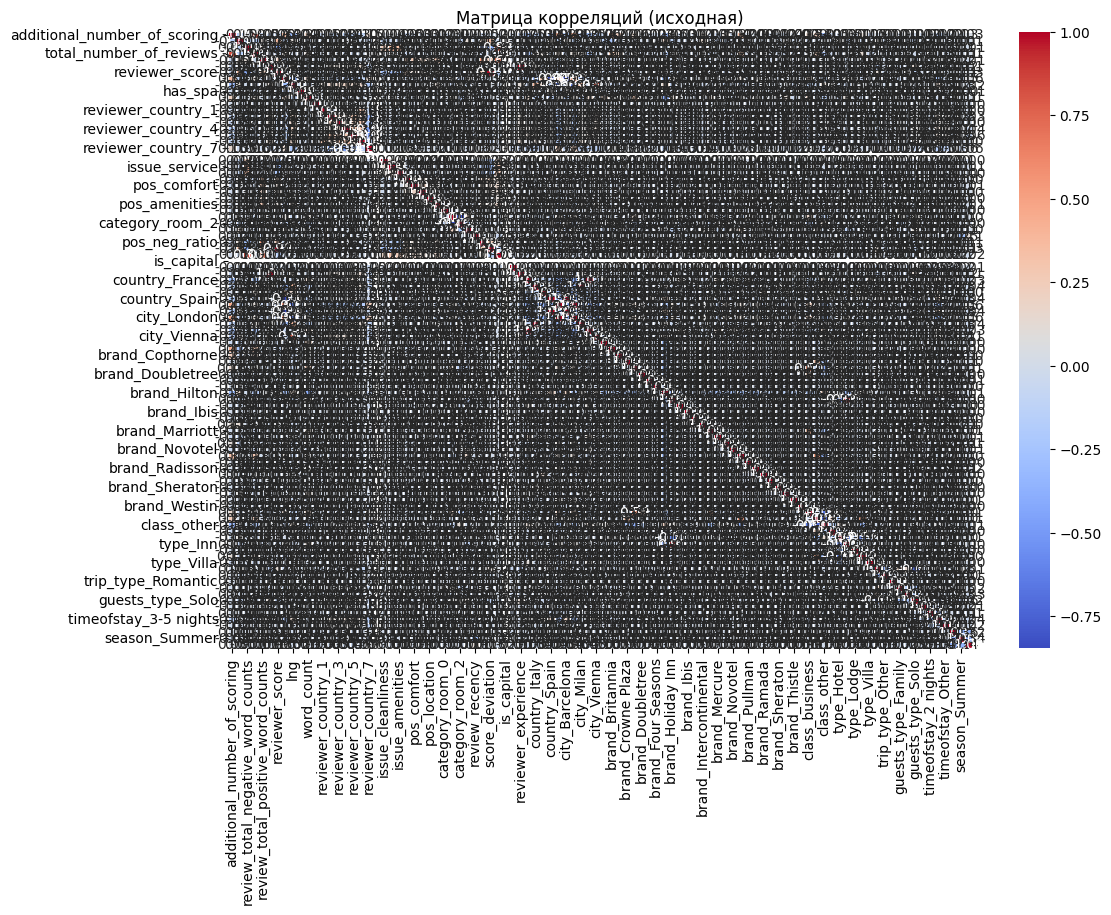

In [325]:
# Визуализация матрицы корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляций (исходная)")
plt.show()

In [326]:
# Создаем множество для хранения признаков, которые нужно удалить
high_corr_features = set()
# Ищем пары признаков с корреляцией > 0.7 или < -0.7
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)
print("Признаки с высокой корреляцией (> |0.7|):", high_corr_features)

Признаки с высокой корреляцией (> |0.7|): {'city_London', 'total_number_of_reviews', 'country_Spain', 'class_other', 'reviewer_experience', 'city_Barcelona', 'city_Paris', 'score_deviation', 'city_Milan', 'type_Inn', 'category_room_2', 'city_Vienna', 'total_word_count'}


In [327]:
# Удаление
data_reduced = data.drop(columns=high_corr_features)

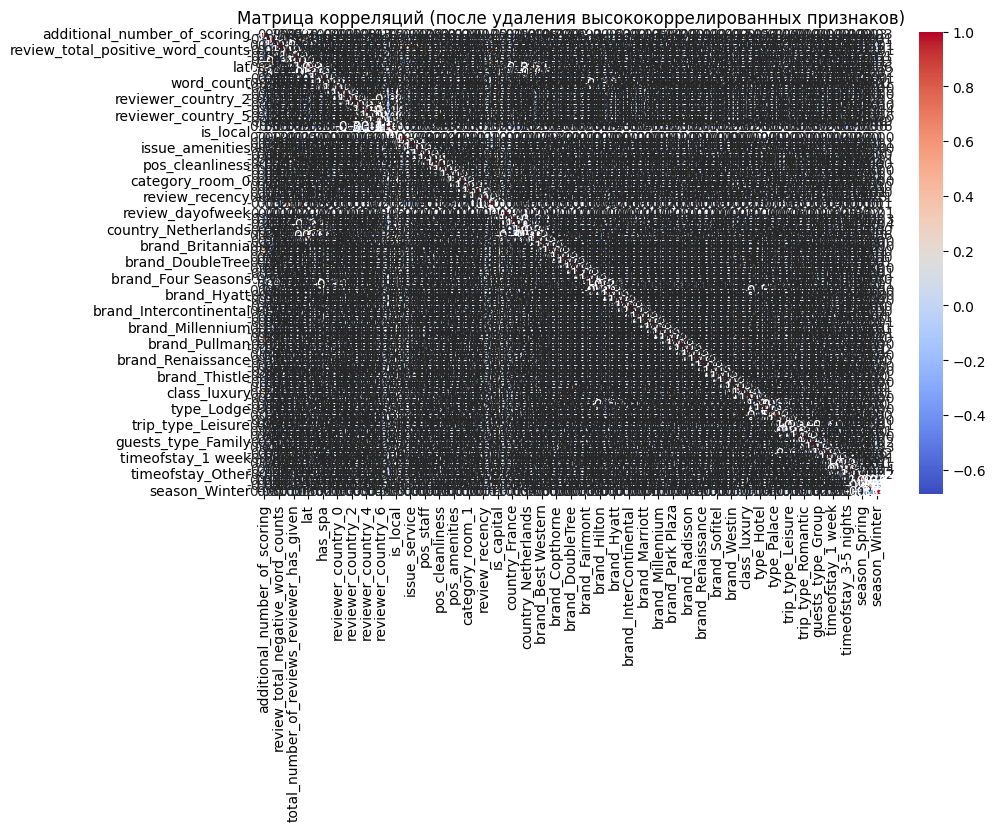

In [328]:
corr_matrix_reduced = data_reduced.corr()
# Визуализация новой матрицы корреляций
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляций (после удаления высококоррелированных признаков)")
plt.show()

## MAPE

In [333]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях
X = data_reduced.drop(['reviewer_score'], axis = 1)  
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [334]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)
# Учет только численных данных
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train) 
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [335]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13178386822890106


Сохранить красиво матрицу

In [331]:
import plotly.express as px
corr_matrix = data.corr()
# Создаем интерактивную тепловую карту
fig = px.imshow(
    corr_matrix,
    text_auto=".2f",  # показывать значения с округлением до 2 знаков
    color_continuous_scale="RdBu",  # цветовая схема (красный-синий)
    zmin=-1,  # минимум для шкалы (-1 для корреляции)
    zmax=1,   # максимум для шкалы (1 для корреляции)
    title="Матрица корреляций (интерактивная)"
)
# Сохраняем в HTML
fig.write_html("correlation_matrix.html")

In [332]:
import plotly.express as px
corr_matrix = data_reduced.corr()
# Создаем интерактивную тепловую карту
fig = px.imshow(
    corr_matrix,
    text_auto=".2f",  # показывать значения с округлением до 2 знаков
    color_continuous_scale="RdBu",  # цветовая схема (красный-синий)
    zmin=-1,  # минимум для шкалы (-1 для корреляции)
    zmax=1,   # максимум для шкалы (1 для корреляции)
    title="Матрица корреляций (интерактивная)"
)
# Сохраняем в HTML
fig.write_html("correlation_matrix_clear.html")